In [5]:
import pandas as pd
import numpy as np
%matplotlib inline

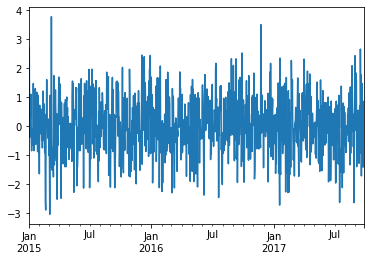

In [6]:
s = pd.Series(np.random.randn(1000),
              index=pd.date_range('1/1/2015', periods=1000))
s.plot()

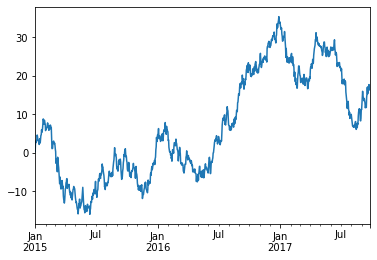

In [7]:
s = s.cumsum()
s.plot()

In [13]:
r = s.rolling(window = 30)
r.mean()

2015-01-01          NaN
2015-01-02          NaN
2015-01-03          NaN
2015-01-04          NaN
2015-01-05          NaN
                ...    
2017-09-22    13.106810
2017-09-23    13.329802
2017-09-24    13.491748
2017-09-25    13.700139
2017-09-26    13.899303
Freq: D, Length: 1000, dtype: float64

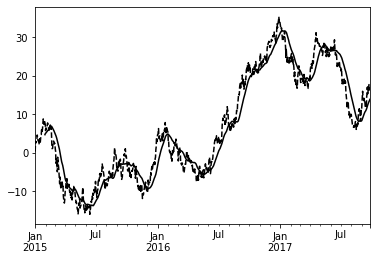

In [14]:
# 이동평균 추세선 그릴때 rolling을 사용합니다.
s.plot(style = 'k--')
r.mean().plot(style = 'k')

In [18]:
df = pd.DataFrame(np.random.randn(1000, 4),
                   index=pd.date_range('1/1/2015', periods=1000),
                   columns=['A', 'B', 'C', 'D'])

In [19]:
df

,A,B,C,D
2015-01-01,1.618511,-0.710953,0.314593,-0.688577
2015-01-02,-0.175098,0.836505,1.901537,0.621631
2015-01-03,0.574632,2.352836,-0.155505,0.141705
2015-01-04,0.004193,1.983568,-0.273717,-0.132832
2015-01-05,0.051941,0.673851,-2.325476,-0.175977
...,...,...,...,...
2017-09-22,0.782195,-0.315208,0.471003,1.222946
2017-09-23,-0.216420,0.746727,0.579233,-0.380714
2017-09-24,1.213994,-1.784882,-1.864298,0.827632
2017-09-25,0.844462,-0.720954,-0.815501,1.278858


In [22]:
df = df.cumsum()
df

,A,B,C,D
2015-01-01,1.618511,-0.710953,0.314593,-0.688577
2015-01-02,3.061923,-0.585401,2.530723,-0.755522
2015-01-03,5.079967,1.892987,4.591348,-0.680763
2015-01-04,7.102204,6.354943,6.378257,-0.738835
2015-01-05,9.176382,11.490751,5.839688,-0.972885
...,...,...,...,...
2017-09-22,-19223.520199,-17237.000705,78.753859,-15126.872803
2017-09-23,-19251.875433,-17262.338610,71.421617,-15158.835512
2017-09-24,-19279.016673,-17289.461396,62.225076,-15189.970588
2017-09-25,-19305.313450,-17317.305137,52.213034,-15219.826807


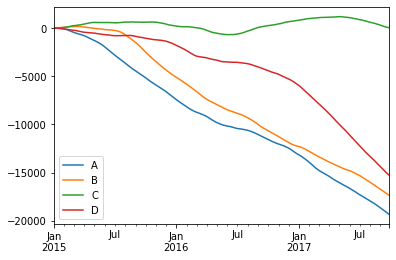

In [23]:
df.plot()

array([<matplotlib.axes._subplots.AxesSubplot object at 0x00000249A7B81A48>,
      dtype=object)

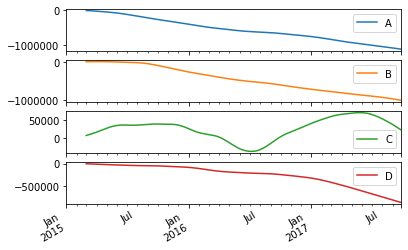

In [24]:
df.rolling(window = 60).sum().plot(subplots = True)

In [25]:
df.rolling(window=len(df), min_periods=1).mean()[:5]

,A,B,C,D
2015-01-01,1.618511,-0.710953,0.314593,-0.688577
2015-01-02,2.340217,-0.648177,1.422658,-0.722050
2015-01-03,3.253467,0.198878,2.478888,-0.708287
2015-01-04,4.215651,1.737894,3.453730,-0.715924
2015-01-05,5.207798,3.688465,3.930922,-0.767316


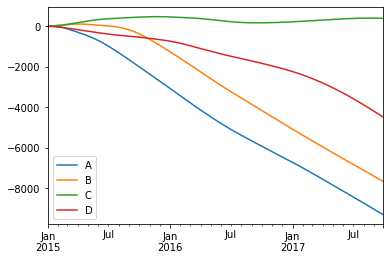

In [26]:
df.rolling(window=len(df), min_periods=1).mean().plot()

In [27]:
df.expanding(min_periods=1).mean()

,A,B,C,D
2015-01-01,1.618511,-0.710953,0.314593,-0.688577
2015-01-02,2.340217,-0.648177,1.422658,-0.722050
2015-01-03,3.253467,0.198878,2.478888,-0.708287
2015-01-04,4.215651,1.737894,3.453730,-0.715924
2015-01-05,5.207798,3.688465,3.930922,-0.767316
...,...,...,...,...
2017-09-22,-9255.695590,-7616.432705,398.513342,-4424.178540
2017-09-23,-9265.721848,-7626.107635,398.185266,-4434.945498
2017-09-24,-9275.755210,-7635.790355,397.848633,-4445.722076
2017-09-25,-9285.794808,-7645.481561,397.502651,-4456.506966


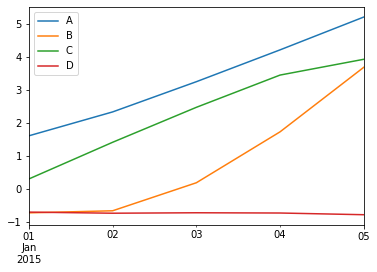

In [28]:
df.expanding(min_periods=1).mean()[:5].plot()

In [29]:
df.expanding?

In [32]:
dfe = pd.DataFrame({'B': [0, 1, 2, np.nan, 4]})
dfe

,B
0,0.0
1,1.0
2,2.0
3,NaN
4,4.0


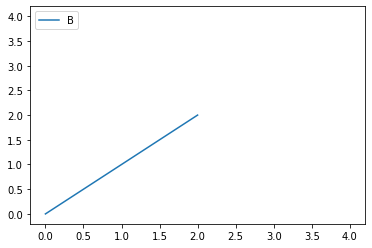

In [33]:
dfe.plot()

In [34]:
dfe.expanding(2).sum()

,B
0,NaN
1,1.0
2,3.0
3,3.0
4,7.0


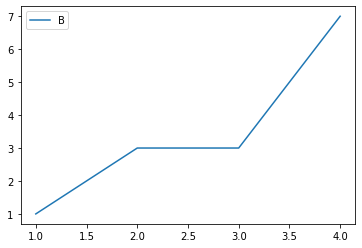

In [35]:
dfe.expanding(2).sum().plot()

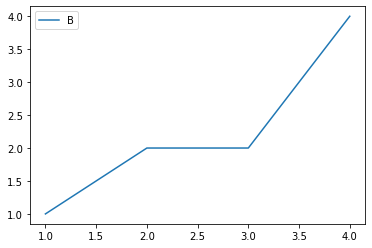

In [36]:
dfe.expanding(2).max().plot()

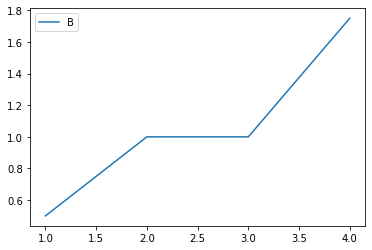

In [37]:
dfe.expanding(2).mean().plot()